# Parameter Fitting Multivariate Gaussian with Pandas
Import car_title.txt.
1. First column data: Acceleration (arbitrary units)
2. Second column data: Horse power (arbitrary units) one NaN
3. Third column data: Weight (arbitrary units)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
%matplotlib inline

df = pd.read_csv('car_title.txt')
print(df)


    Max Acceleration  Horse Power  Weight
0               12.0        130.0    3504
1               11.5        165.0    3693
2               11.0        150.0    3436
3               12.0        150.0    3433
4               10.5        140.0    3449
..               ...          ...     ...
95              15.6         86.0    2790
96              24.6         52.0    2130
97              11.6         84.0    2295
98              18.6         79.0    2625
99              19.4         82.0    2720

[100 rows x 3 columns]


Make a scatter plot of the Acceleration vs Weight

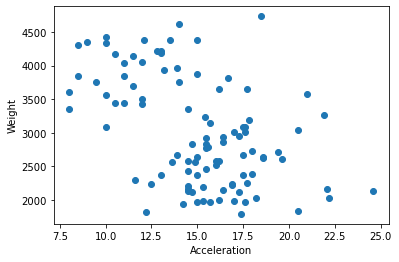

In [2]:
fig, ax = plt.subplots()
plt.scatter(df['Max Acceleration'],df['Weight'])
plt.xlabel('Acceleration')
plt.ylabel('Weight')

plt.show()


Apply parameter fitting
1. To calculate the covariance matrix see:
   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html


In [3]:
xb = df[['Max Acceleration','Weight']].mean()
print(xb)
# Note we use only n-1 here
# Covarniance Matrix
S = df[['Max Acceleration','Weight']].cov()
print(S)

Max Acceleration      15.028
Weight              3011.830
dtype: float64
                  Max Acceleration         Weight
Max Acceleration         11.212137   -1318.455798
Weight                -1318.455798  651188.344545


1. Multivariate Gaussian Distribution see: 

https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

2. Plot countours see:

https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html


(166, 294)
[[ 8.   8.   8.  ...  8.   8.   8. ]
 [ 8.1  8.1  8.1 ...  8.1  8.1  8.1]
 [ 8.2  8.2  8.2 ...  8.2  8.2  8.2]
 ...
 [24.3 24.3 24.3 ... 24.3 24.3 24.3]
 [24.4 24.4 24.4 ... 24.4 24.4 24.4]
 [24.5 24.5 24.5 ... 24.5 24.5 24.5]]
[[1795. 1805. 1815. ... 4705. 4715. 4725.]
 [1795. 1805. 1815. ... 4705. 4715. 4725.]
 [1795. 1805. 1815. ... 4705. 4715. 4725.]
 ...
 [1795. 1805. 1815. ... 4705. 4715. 4725.]
 [1795. 1805. 1815. ... 4705. 4715. 4725.]
 [1795. 1805. 1815. ... 4705. 4715. 4725.]]
(166, 294, 2)


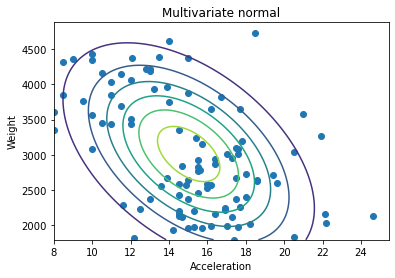

In [4]:
# plot the scatter plot again
fig, ax = plt.subplots()
plt.scatter(df['Max Acceleration'],df['Weight'])
plt.xlabel('Acceleration')
plt.ylabel('Weight')


# Multivariate Gaussian Distribution
rv = sts.multivariate_normal(xb, S)
# Introduce a meshgrid
X1, X2 = np.mgrid[df['Max Acceleration'].min(): df['Max Acceleration'].max():.1,
                df['Weight'].min(): df['Weight'].max():10]
print(X1.shape)
print(X1)
print(X2)
# Extend the dimensions from 2 (166x294) => 3 (166x294x2)
pos = np.empty(np.concatenate((X1.shape,2),axis=None))
print(pos.shape)
pos[:, :, 0] = X1; pos[:, :, 1] = X2
#print(pos)


CS = ax.contour(X1, X2, rv.pdf(pos))
plt.title('Multivariate normal')
plt.show()